# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [2]:
print('x_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

x_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
type(y_train)

numpy.ndarray

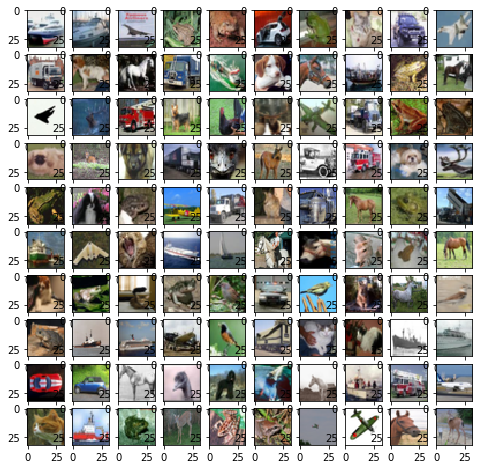

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [6]:
import numpy as np 

lt5 = np.where(y_train < 5)
gt5 = np.where(y_train >= 5)

print(lt5[0])
lt5_test = np.where(y_test < 5)
gt5_test = np.where(y_test >= 5)


[    3     4     5 ... 49995 49998 49999]


1

In [0]:

x_train_lt5 = x_train[lt5[0]]
y_train_lt5 = y_train[lt5[0]]

x_test_lt5 = x_test[lt5_test[0]]
y_test_lt5 = y_test[lt5_test[0]]



In [0]:
x_train_gt5 = x_train[gt5[0]]
y_train_gt5 = y_train[gt5[0]] - 5 
x_test_gt5 = x_test[gt5_test[0]]         
y_test_gt5 = y_test[gt5_test[0]]  - 5

In [9]:
y_train_gt5

array([[1],
       [4],
       [4],
       ...,
       [0],
       [1],
       [4]], dtype=uint8)

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
import keras
num_classes = 10
y_train_lt5 = keras.utils.to_categorical(y_train_lt5, num_classes)
y_test_lt5 = keras.utils.to_categorical(y_test_lt5, num_classes)

In [11]:
print(y_train_lt5.shape)

(25000, 10)


In [12]:
x_train_lt5 = x_train_lt5.astype('float32')
x_test_lt5 = x_test_lt5.astype('float32')

#Normalizing the input
x_train_lt5 /= 255
x_test_lt5 /= 255
print('x_train shape:', x_train_lt5.shape)
print(x_train_lt5.shape[0], 'train samples')
print(x_test_lt5.shape[0], 'test samples')

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten


#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,3),name='conv_1'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation='softmax',name='dense_2'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
model.fit(x_train_lt5, y_train_lt5,
          epochs=10,
          verbose=1,
          validation_data=(x_test_lt5, y_test_lt5))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25000 samples, validate on 5000 samples
Epoch 1/10





25000/25000 [==============================] - 31s 1ms/step - loss: 1.1337 - acc: 0.5395 - val_loss: 0.8777 - val_acc: 0.6396
Epoch 2/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.9238 - acc: 0.6305 - val_loss: 0.8138 - val_acc: 0.6786
Epoch 3/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.8684 - acc: 0.6604 - val_loss: 0.7728 - val_acc: 0.6936
Epoch 4/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.8161 - acc: 0.6824 - val_loss: 0.7568 - val_acc: 0.7072
Epoch 5/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.7839 - acc: 0.6927 - val_loss: 0.7462 - val_acc: 0.7132
Epoch 6/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.7565 - acc: 0.7042 - val_loss: 0.7323 - val_acc: 0.7096
Epoch 7/10
25000/25000 [===

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [16]:
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
max_1
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_2
True


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [17]:
x_train_gt5 = x_train_gt5.astype('float32')
x_test_gt5 = x_test_gt5.astype('float32')

#Normalizing the input
x_train_gt5 /= 255
x_test_gt5 /= 255
print('x_train shape:', x_train_gt5.shape)
print(x_train_gt5.shape[0], 'train samples')
print(x_test_gt5.shape[0], 'test samples')

x_train shape: (25000, 32, 32, 3)
25000 train samples
5000 test samples


In [0]:
import keras
num_classes = 10
y_train_gt5 = keras.utils.to_categorical(y_train_gt5, num_classes)
y_test_gt5 = keras.utils.to_categorical(y_test_gt5, num_classes)

In [19]:
y_test_gt5.shape

(5000, 10)

In [20]:
model.fit(x_train_gt5, y_train_gt5,
          epochs=10,
          verbose=1,
          validation_data=(x_test_gt5, y_test_gt5))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
  160/25000 [..............................] - ETA: 26s - loss: 4.9633 - acc: 0.0938

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


25000/25000 [==============================] - 29s 1ms/step - loss: 1.4787 - acc: 0.3421 - val_loss: 1.0149 - val_acc: 0.6242
Epoch 2/10
25000/25000 [==============================] - 29s 1ms/step - loss: 1.1065 - acc: 0.5331 - val_loss: 0.7777 - val_acc: 0.7272
Epoch 3/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.9319 - acc: 0.6395 - val_loss: 0.6991 - val_acc: 0.7488
Epoch 4/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.8264 - acc: 0.6868 - val_loss: 0.6074 - val_acc: 0.7836
Epoch 5/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.7485 - acc: 0.7203 - val_loss: 0.5807 - val_acc: 0.7934
Epoch 6/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6875 - acc: 0.7452 - val_loss: 0.5599 - val_acc: 0.8006
Epoch 7/10
25000/25000 [==============================] - 29s 1ms/step - loss: 0.6523 - acc: 0.7611 - val_loss: 0.5371 - val_acc: 0.8046
Epoch 8/10
25000/25000 [============================

## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 6. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [21]:
# import pandas as pd
# data = pd.read_csv('./tweets.csv', encoding = "ISO-8859-1").dropna()

from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/AIML/R8/XLab/tweets.csv', encoding = "ISO-8859-1").dropna()

In [23]:
data.shape

(3291, 3)

In [24]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
data = data[(data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [26]:
data.shape

(3191, 3)

### 7. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [0]:
vect = CountVectorizer()
cv_dtm = vect.fit_transform(data['tweet_text'])


In [29]:
cv_dtm.shape

(3191, 5648)

In [30]:
print(cv_dtm)

  (0, 5416)	1
  (0, 2286)	1
  (0, 79)	1
  (0, 2641)	1
  (0, 227)	1
  (0, 2426)	1
  (0, 5144)	1
  (0, 417)	2
  (0, 4145)	1
  (0, 2663)	1
  (0, 5373)	1
  (0, 1290)	1
  (0, 3304)	1
  (0, 5014)	1
  (0, 5230)	1
  (0, 3706)	1
  (0, 4619)	1
  (0, 4772)	1
  (1, 2641)	1
  (1, 417)	1
  (1, 4772)	1
  (1, 2692)	1
  (1, 2783)	1
  (1, 152)	1
  (1, 1907)	1
  :	:
  (3189, 2641)	1
  (3189, 2663)	1
  (3189, 4772)	1
  (3189, 2631)	1
  (3189, 347)	1
  (3189, 1936)	2
  (3189, 302)	2
  (3189, 3280)	1
  (3189, 4784)	1
  (3189, 5277)	1
  (3189, 2275)	1
  (3189, 5247)	1
  (3189, 800)	1
  (3189, 2486)	1
  (3189, 3209)	1
  (3189, 286)	1
  (3189, 4203)	1
  (3189, 4710)	1
  (3189, 798)	1
  (3189, 1816)	1
  (3189, 4595)	1
  (3190, 4772)	1
  (3190, 2631)	1
  (3190, 2909)	1
  (3190, 1699)	1


### 8. Find number of different words in vocabulary

#### Tip: To see all available functions for an Object use dir

In [31]:
dir(cv_dtm)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_asindices',
 '_binopt',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix__set_has_canonical_format',
 '_cs_matrix__set_sorted

### Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [32]:
pd.value_counts(data['is_there_an_emotion_directed_at_a_brand_or_product'])

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

###  Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'label'

Hint: use map on that column and give labels

In [0]:
data['label'] = data.is_there_an_emotion_directed_at_a_brand_or_product.map({'Positive emotion':1, 'Negative emotion':0})

### 9. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = data.tweet_text
y = data.label

In [35]:
X.head()

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 10. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


def logistic_reg(vect):
    x_train_dtm = vect.fit_transform(X_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(X_test)
    logreg = LogisticRegression()
    logreg.fit(x_train_dtm, y_train)
    y_pred_class = logreg.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))


## 11. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_test(vect):
    print('+++')
    x_train_dtm = vect.fit_transform(X_train)
    print('!!!')
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [39]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)
logistic_reg(vect)

+++
!!!
Features:  24855
Accuracy:  0.8558897243107769
Features:  24855
Accuracy:  0.8659147869674185


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 12. Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [40]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words= 'english')
tokenize_test(vect)
logistic_reg(vect)

+++
!!!
Features:  19126
Accuracy:  0.8583959899749374
Features:  19126
Accuracy:  0.8671679197994987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 13. Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [41]:
vect = CountVectorizer( max_features= 300)
tokenize_test(vect)
logistic_reg(vect)

+++
!!!
Features:  300
Accuracy:  0.8145363408521303
Features:  300
Accuracy:  0.8383458646616542


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 14. Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [42]:
vect = CountVectorizer(ngram_range=(1, 2),  max_features = 15000)
tokenize_test(vect)
logistic_reg(vect)

+++
!!!
Features:  15000
Accuracy:  0.8533834586466166
Features:  15000
Accuracy:  0.8671679197994987


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 15. Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [43]:
vect = CountVectorizer(ngram_range=(1, 2),  min_df = 2)
tokenize_test(vect)
logistic_reg(vect)

+++
!!!
Features:  7764
Accuracy:  0.8583959899749374
Features:  7764
Accuracy:  0.8771929824561403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
